In [1]:
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
import geopy
## for machine learning
from sklearn import preprocessing, cluster
import scipy
## for deep learning
import minisom
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim 
import requests
CLIENT_ID = "KTCJJ2YZ2143QHEZ2JAQS4FJIO5DLSDO0YN4YBXPMI5NKTEF" #Foursquare ID
CLIENT_SECRET = "KNG2LO22BPLHN1E3OAHWLYQ5PQBN14XYZMEMAS0CPJEJKOTR" #Foursquare_Secret
VERSION = '20200316'
LIMIT = 10000

In [2]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    22.805618,86.203110,
    30000, 
    LIMIT)

In [3]:
results = requests.get(url).json()

In [4]:
results

{'meta': {'code': 200, 'requestId': '639581d8555faf7946b2b672'},
 'response': {'queryRefinements': {'target': {'type': 'path',
    'url': '/venue/explore',
    'params': {'ll': '22.805618,86.203110', 'radius': '30000'}},
   'refinements': [{'query': 'Food'},
    {'query': 'Nightlife'},
    {'query': 'Coffee'},
    {'query': 'Shops'},
    {'query': 'Arts'},
    {'query': 'Outdoors'}]},
  'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Jamshedpur',
  'headerFullLocation': 'Jamshedpur',
  'headerLocationGranularity': 'city',
  'totalResults': 13,
  'suggestedBounds': {'ne': {'lat': 23.07561827000027,
    'lng': 86.49546061391933},
   'sw': {'lat': 22.53561772999973, 'lng': 85.91075938608066}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalIn

In [5]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

/var/folders/fd/g2wkltdx6q5gxxgwm80wb0qc0000gn/T/ipykernel_1454/2768318480.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venues = json_normalize(venues)


In [6]:
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups
0,e-0-4b872a6df964a52038b431e3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b872a6df964a52038b431e3,Jubilee Park,Jublee Road,Sakchi,22.809905,86.189503,"[{'label': 'display', 'lat': 22.80990534, 'lng...",1475,831013,IN,Jamshedpur,Jharkhand,India,"[Jublee Road (Sakchi), Jamshedpur 831013, Jhar...","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[]
1,e-0-4cd55b402944b1f7c0645cec-1,0,"[{'summary': 'This spot is popular', 'type': '...",4cd55b402944b1f7c0645cec,Bru Beck Bakery,Bistupur Main Road,NaN,22.805419,86.184466,"[{'label': 'display', 'lat': 22.80541886194341...",1913,831001,IN,Jamshedpur,Jharkhand,India,"[Bistupur Main Road, Jamshedpur 831001, Jharkh...","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[]
2,e-0-4f5711f3e4b0be1ce2d53784-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f5711f3e4b0be1ce2d53784,The Alcor Hotel,Holding No. 4 Ramdas Bhatta,Bistapur,22.793911,86.176419,"[{'label': 'display', 'lat': 22.79391054191089...",3033,831001,IN,Jamshedpur,Jharkhand,India,"[Holding No. 4 Ramdas Bhatta (Bistapur), Jamsh...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[]
3,e-0-4eff3205490182a1a708f24b-3,0,"[{'summary': 'This spot is popular', 'type': '...",4eff3205490182a1a708f24b,Little Italy,Bistupur,NaN,22.799081,86.180309,"[{'label': 'display', 'lat': 22.79908134522725...",2450,NaN,IN,Jamshedpur,Jharkhand,India,"[Bistupur, Jamshedpur, Jharkhand, India]","[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",0,[]
4,e-0-4bf76504c07c9c746aa3bbef-4,0,"[{'summary': 'This spot is popular', 'type': '...",4bf76504c07c9c746aa3bbef,Cafe Coffee Day,Bistupur,"22.796966,86.184046",22.797649,86.184104,"[{'label': 'display', 'lat': 22.79764903441875...",2142,NaN,IN,Jamshedpur,Jharkhand,India,"[Bistupur (22.796966,86.184046), Jamshedpur, J...","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[]
5,e-0-4e1c0613d22de289c0be9343-5,0,"[{'summary': 'This spot is popular', 'type': '...",4e1c0613d22de289c0be9343,Domino's Pizza,"ROSHAN TOWER,FIRST FLOOR,BISTUPUR MAIN ROADBES...",NaN,22.791000,86.181000,"[{'label': 'display', 'lat': 22.791, 'lng': 86...",2792,831001,IN,Jamshedpur,Jharkhand,India,"[ROSHAN TOWER,FIRST FLOOR,BISTUPUR MAIN ROADBE...","[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",0,[]
6,e-0-4f4f2347e4b02447947a20f3-6,0,"[{'summary': 'This spot is popular', 'type': '...",4f4f2347e4b02447947a20f3,Hotel sonnet,Beside Nanji Govindji Building,Contractor's Area,22.798534,86.179400,"[{'label': 'display', 'lat': 22.79853384708952...",2557,NaN,IN,Jamshedpur,Jharkhand,India,[Beside Nanji Govindji Building (Contractor's ...,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[]
7,e-0-4f23de4be4b0008741b77660-7,0,"[{'summary': 'This spot is popular', 'type': '...",4f23de4be4b0008741b77660,Eylex Fun N Films,NH 33,NaN,22.843959,86.216242,"[{'label': 'display', 'lat': 22.84395854604165...",4475,NaN,IN,NaN,NaN,India,"[NH 33, India]","[{'id': '4bf58dd8d48988d180941735', 'name': 'M...",0,[]
8,e-0-4c8b448f52a98cfab99134e9-8,0,"[{'summary': 'This spot is popular', 'type': '...",4c8b448f52a98cfab99134e9,Dosa king,Om Plaza,Landmark - Sparx / The Sonnet,22.798307,86.179274,"[{'label': 'display', 'lat': 22.79830710331676...",2577,831001,IN,Jamshedpur,Jharkhand,India,"[Om Plaza (Landmark - Sparx / The Sonnet), Jam...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[]
9,e-0-51b2c4d0498e2f0af18e29ed-9,0,"[{'summary': 'This spot is popular', 'type': '...",51b2c4d0498e2f0af18e29ed,Bistupur,NaN,NaN,22.795187,86.184034,"[{'label': 'display', 'lat': 22.79518742256769...",2276,NaN,IN,NaN,NaN,India,[India],"[{'id': '50be8e

In [7]:
resta=[]
oth=[]
for lat,long in zip(nearby_venues['venue.location.lat'],nearby_venues['venue.location.lng']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION, 
      lat,long,
      1000, 
      100)
    res = requests.get(url).json()
    venue = res['response']['groups'][0]['items']
    nearby_venue = json_normalize(venue)
    df=nearby_venue['venue.categories']

    g=[]
    for i in range(0,df.size):
      g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
      if i>1:
        co+=1
    resta.append(co)
    oth.append(len(g)-co)

nearby_venues['restaurant']=resta
nearby_venues['others']=oth
nearby_venues

/var/folders/fd/g2wkltdx6q5gxxgwm80wb0qc0000gn/T/ipykernel_1454/60030951.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)
/var/folders/fd/g2wkltdx6q5gxxgwm80wb0qc0000gn/T/ipykernel_1454/60030951.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)
/var/folders/fd/g2wkltdx6q5gxxgwm80wb0qc0000gn/T/ipykernel_1454/60030951.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)
/var/folders/fd/g2wkltdx6q5gxxgwm80wb0qc0000gn/T/ipykernel_1454/60030951.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)
/var/folders/fd/g2wkltdx6q5gxxgwm80wb0qc0000gn/T/ipykernel_1454/60030951.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use 

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,restaurant,others
0,e-0-4b872a6df964a52038b431e3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b872a6df964a52038b431e3,Jubilee Park,Jublee Road,Sakchi,22.809905,86.189503,"[{'label': 'display', 'lat': 22.80990534, 'lng...",...,IN,Jamshedpur,Jharkhand,India,"[Jublee Road (Sakchi), Jamshedpur 831013, Jhar...","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],1,3
1,e-0-4cd55b402944b1f7c0645cec-1,0,"[{'summary': 'This spot is popular', 'type': '...",4cd55b402944b1f7c0645cec,Bru Beck Bakery,Bistupur Main Road,NaN,22.805419,86.184466,"[{'label': 'display', 'lat': 22.80541886194341...",...,IN,Jamshedpur,Jharkhand,India,"[Bistupur Main Road, Jamshedpur 831001, Jharkh...","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],6,4
2,e-0-4f5711f3e4b0be1ce2d53784-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f5711f3e4b0be1ce2d53784,The Alcor Hotel,Holding No. 4 Ramdas Bhatta,Bistapur,22.793911,86.176419,"[{'label': 'display', 'lat': 22.79391054191089...",...,IN,Jamshedpur,Jharkhand,India,"[Holding No. 4 Ramdas Bhatta (Bistapur), Jamsh...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],5,4
3,e-0-4eff3205490182a1a708f24b-3,0,"[{'summary': 'This spot is popular', 'type': '...",4eff3205490182a1a708f24b,Little Italy,Bistupur,NaN,22.799081,86.180309,"[{'label': 'display', 'lat': 22.79908134522725...",...,IN,Jamshedpur,Jharkhand,India,"[Bistupur, Jamshedpur, Jharkhand, India]","[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",0,[],6,4
4,e-0-4bf76504c07c9c746aa3bbef-4,0,"[{'summary': 'This spot is popular', 'type': '...",4bf76504c07c9c746aa3bbef,Cafe Coffee Day,Bistupur,"22.796966,86.184046",22.797649,86.184104,"[{'label': 'display', 'lat': 22.79764903441875...",...,IN,Jamshedpur,Jharkhand,India,"[Bistupur (22.796966,86.184046), Jamshedpur, J...","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],6,4
5,e-0-4e1c0613d22de289c0be9343-5,0,"[{'summary': 'This spot is popular', 'type': '...",4e1c0613d22de289c0be9343,Domino's Pizza,"ROSHAN TOWER,FIRST FLOOR,BISTUPUR MAIN ROADBES...",NaN,22.791000,86.181000,"[{'label': 'display', 'lat': 22.791, 'lng': 86...",...,IN,Jamshedpur,Jharkhand,India,"[ROSHAN TOWER,FIRST FLOOR,BISTUPUR MAIN ROADBE...","[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",0,[],6,5
6,e-0-4f4f2347e4b02447947a20f3-6,0,"[{'summary': 'This spot is popular', 'type': '...",4f4f2347e4b02447947a20f3,Hotel sonnet,Beside Nanji Govindji Building,Contractor's Area,22.798534,86.179400,"[{'label': 'display', 'lat': 22.79853384708952...",...,IN,Jamshedpur,Jharkhand,India,[Beside Nanji Govindji Building (Contractor's ...,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],6,4
7,e-0-4f23de4be4b0008741b77660-7,0,"[{'summary': 'This spot is popular', 'type': '...",4f23de4be4b0008741b77660,Eylex Fun N Films,NH 33,NaN,22.843959,86.216242,"[{'label': 'display', 'lat': 22.84395854604165...",...,IN,NaN,NaN,India,"[NH 33, India]","[{'id': '4bf58dd8d48988d180941735', 'name': 'M...",0,[],1,3
8,e-0-4c8b448f52a98cfab99134e9-8,0,"[{'summary': 'This spot is popular', 'type': '...",4c8b448f52a98cfab99134e9,Dosa king,Om Plaza,Landmark - Sparx / The Sonnet,22.798307,86.179274,"[{'label': 'display', 'lat': 22.79830710331676...",...,IN,Jamshedpur,Jharkhand,India,"[Om Plaza (Landmark - Sparx / The Sonnet), Jam...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],6,4
9,e-0-51b2c4d0498e2f0af18e29ed-9,0,"[{'summary': 'This spot is popular', 'type': '...",51b2c4d0498e2f0af18e29ed,Bistupur,NaN,NaN,22.795187,86.184034,"[{'label': 'display', 'lat': 22.79518742256769...",...,IN,NaN,NaN,India,[India],"[{'id': '50be8ee891d4fa8dcc7199a7', 'name': 'M...",0,[],6,4


In [8]:
lat=nearby_venues['venue.location.lat']
long=nearby_venues['venue.location.lng']

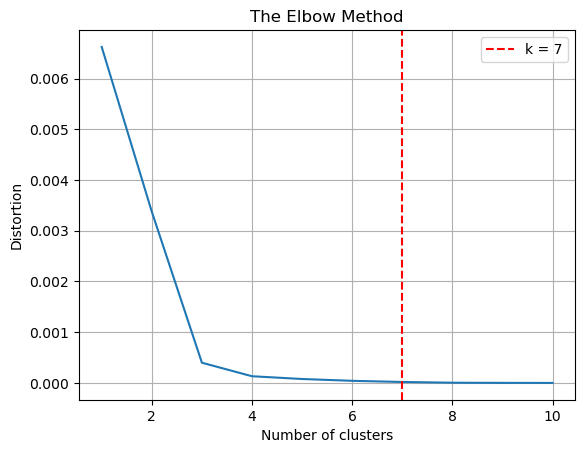

In [9]:
f=['venue.location.lat','venue.location.lng']
X = nearby_venues[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [10]:
city = "Jamshedpur"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Jamshedpur, Golmuri-Cum-Jugsalai, Purbi Singhbhum, Jharkhand, 831001, India
[lat, long]: [22.8015194, 86.2029579]


In [11]:
nearby_venues.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,restaurant,others
0,e-0-4b872a6df964a52038b431e3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b872a6df964a52038b431e3,Jubilee Park,Jublee Road,Sakchi,22.809905,86.189503,"[{'label': 'display', 'lat': 22.80990534, 'lng...",...,IN,Jamshedpur,Jharkhand,India,"[Jublee Road (Sakchi), Jamshedpur 831013, Jhar...","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],1,3
1,e-0-4cd55b402944b1f7c0645cec-1,0,"[{'summary': 'This spot is popular', 'type': '...",4cd55b402944b1f7c0645cec,Bru Beck Bakery,Bistupur Main Road,NaN,22.805419,86.184466,"[{'label': 'display', 'lat': 22.80541886194341...",...,IN,Jamshedpur,Jharkhand,India,"[Bistupur Main Road, Jamshedpur 831001, Jharkh...","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],6,4
2,e-0-4f5711f3e4b0be1ce2d53784-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f5711f3e4b0be1ce2d53784,The Alcor Hotel,Holding No. 4 Ramdas Bhatta,Bistapur,22.793911,86.176419,"[{'label': 'display', 'lat': 22.79391054191089...",...,IN,Jamshedpur,Jharkhand,India,"[Holding No. 4 Ramdas Bhatta (Bistapur), Jamsh...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],5,4
3,e-0-4eff3205490182a1a708f24b-3,0,"[{'summary': 'This spot is popular', 'type': '...",4eff3205490182a1a708f24b,Little Italy,Bistupur,NaN,22.799081,86.180309,"[{'label': 'display', 'lat': 22.79908134522725...",...,IN,Jamshedpur,Jharkhand,India,"[Bistupur, Jamshedpur, Jharkhand, India]","[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",0,[],6,4
4,e-0-4bf76504c07c9c746aa3bbef-4,0,"[{'summary': 'This spot is popular', 'type': '...",4bf76504c07c9c746aa3bbef,Cafe Coffee Day,Bistupur,"22.796966,86.184046",22.797649,86.184104,"[{'label': 'display', 'lat': 22.79764903441875...",...,IN,Jamshedpur,Jharkhand,India,"[Bistupur (22.796966,86.184046), Jamshedpur, J...","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],6,4


In [12]:
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups', 'restaurant', 'others'],
      dtype='object')

In [13]:
n=nearby_venues.drop(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.address','venue.location.city',
       'venue.location.state', 'venue.location.crossStreet',
       'venue.location.postalCode','venue.location.country'],axis=1)

In [14]:
n.columns

Index(['venue.location.lat', 'venue.location.lng',
       'venue.location.formattedAddress', 'restaurant', 'others'],
      dtype='object')

In [15]:
n=n.dropna()
n = n.rename(columns={'venue.location.lat': 'lat', 'venue.location.lng': 'long'})
n

,lat,long,venue.location.formattedAddress,restaurant,others
0,22.809905,86.189503,"[Jublee Road (Sakchi), Jamshedpur 831013, Jhar...",1,3
1,22.805419,86.184466,"[Bistupur Main Road, Jamshedpur 831001, Jharkh...",6,4
2,22.793911,86.176419,"[Holding No. 4 Ramdas Bhatta (Bistapur), Jamsh...",5,4
3,22.799081,86.180309,"[Bistupur, Jamshedpur, Jharkhand, India]",6,4
4,22.797649,86.184104,"[Bistupur (22.796966,86.184046), Jamshedpur, J...",6,4
5,22.791000,86.181000,"[ROSHAN TOWER,FIRST FLOOR,BISTUPUR MAIN ROADBE...",6,5
6,22.798534,86.179400,[Beside Nanji Govindji Building (Contractor's ...,6,4
7,22.843959,86.216242,"[NH 33, India]",1,3
8,22.798307,86.179274,"[Om Plaza (Landmark - Sparx / The Sonnet), Jam...",6,4
9,22.795187,86.184034,[India],6,4


In [16]:
n['venue.location.formattedAddress']

0     [Jublee Road (Sakchi), Jamshedpur 831013, Jhar...
1     [Bistupur Main Road, Jamshedpur 831001, Jharkh...
2     [Holding No. 4 Ramdas Bhatta (Bistapur), Jamsh...
3              [Bistupur, Jamshedpur, Jharkhand, India]
4     [Bistupur (22.796966,86.184046), Jamshedpur, J...
5     [ROSHAN TOWER,FIRST FLOOR,BISTUPUR MAIN ROADBE...
6     [Beside Nanji Govindji Building (Contractor's ...
7                                        [NH 33, India]
8     [Om Plaza (Landmark - Sparx / The Sonnet), Jam...
9                                               [India]
10    [opposite hotel sonnnet, Jamshedpur 831001, Jh...
11       [Telco Township, Jamshedpur, Jharkhand, India]
12    [Inner Circle Road, Jamshedpur, Jharkhand, India]
Name: venue.location.formattedAddress, dtype: object

In [17]:
spec_chars = ["[","]"]
for char in spec_chars:
  n['venue.location.formattedAddress'] = n['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')

/var/folders/fd/g2wkltdx6q5gxxgwm80wb0qc0000gn/T/ipykernel_1454/3350752478.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  n['venue.location.formattedAddress'] = n['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')


In [18]:
x, y = "lat", "long"
color = "restaurant"
size = "others"
popup = "venue.location.formattedAddress"
data = n.copy()

## create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(n[color].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]],popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend


## plot the map
map_

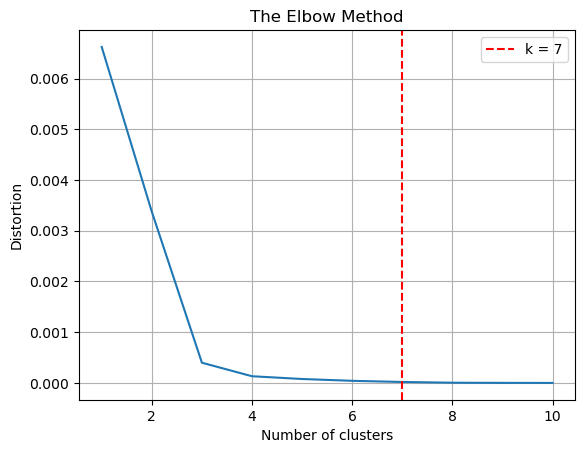

In [19]:
X = n[["lat","long"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [20]:
k = 6
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = n[["lat","long"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
n[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
n

/var/folders/fd/g2wkltdx6q5gxxgwm80wb0qc0000gn/T/ipykernel_1454/910861213.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_X["centroids"].iloc[i] = 1


,lat,long,venue.location.formattedAddress,restaurant,others,cluster,centroids
0,22.809905,86.189503,"'Jublee Road (Sakchi)', 'Jamshedpur 831013', ...",1,3,3,1
1,22.805419,86.184466,"'Bistupur Main Road', 'Jamshedpur 831001', 'J...",6,4,3,0
2,22.793911,86.176419,"'Holding No. 4 Ramdas Bhatta (Bistapur)', 'Ja...",5,4,4,1
3,22.799081,86.180309,"'Bistupur', 'Jamshedpur', 'Jharkhand', 'India'",6,4,0,0
4,22.797649,86.184104,"'Bistupur (22.796966,86.184046)', 'Jamshedpur...",6,4,5,1
5,22.791000,86.181000,"'ROSHAN TOWER,FIRST FLOOR,BISTUPUR MAIN ROADB...",6,5,4,0
6,22.798534,86.179400,"""Beside Nanji Govindji Building (Contractor's...",6,4,0,0
7,22.843959,86.216242,"'NH 33', 'India'",1,3,2,1
8,22.798307,86.179274,"'Om Plaza (Landmark - Sparx / The Sonnet)', '...",6,4,0,0
9,22.795187,86.184034,'India',6,4,5,0


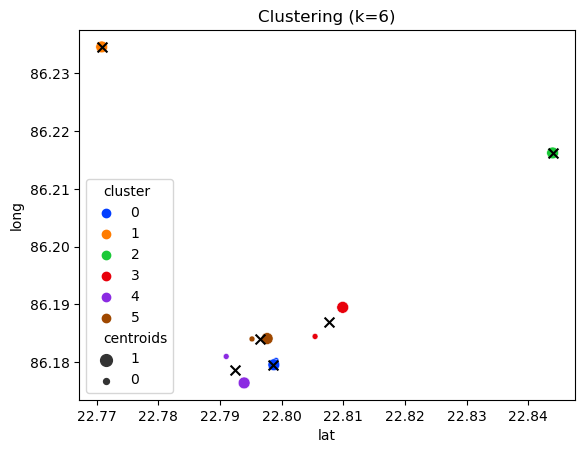

In [21]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

In [22]:
model = cluster.AffinityPropagation()

Text(0.5, 1.0, 'Clustering (k=6)')

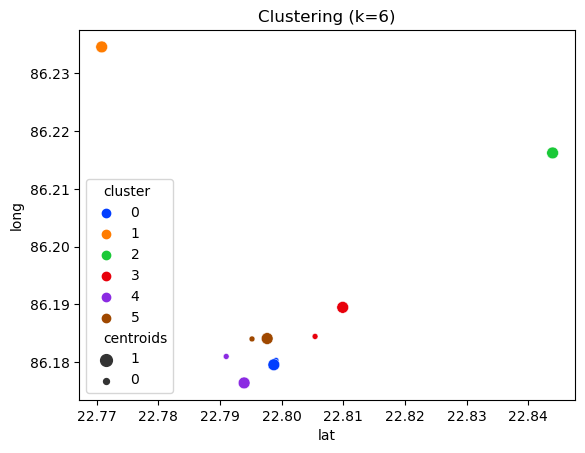

In [23]:
k = n["cluster"].nunique()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering (k='+str(k)+')')

In [24]:
x, y = "lat", "long"
color = "cluster"
size = "restaurant"
popup = "venue.location.formattedAddress"
marker = "centroids"
data = n.copy()
## create color column
lst_elements = sorted(list(n[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """ """+color+""":"""
for i in lst_elements:
     legend_html = legend_html+""" 
      """+str(i)+""""""
legend_html = legend_html+""""""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(n[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_